## Challenge: Preprocesamiento de datos

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

# Ejercicio 1

In [2]:
# Obtención de un dataset de prueba
df = pd.read_csv("drawndata1.csv")

In [3]:
# inspección del dataset
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [4]:
# Creación de dos conjuntos separados de datos
# X agrupará las variables predictoras
X = df[['x', 'y']].values
# y será nuestra columna Target
y = df['z'] == "a"

* 1) Observamos en un plot, la distribución de nuestros datos

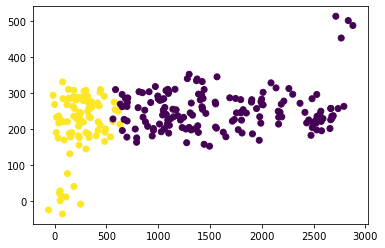

In [5]:
plt.scatter(X[:, 0], X[:, 1], c = y);

* 2) Podemos observar que las variables se encuentran en escalas muy diferentes, por lo tanto procederemos a reescalarlas con StandardScaler de Scikit_Learn, el cual realizará un ajuste standard teniendo en cuenta la media y la varianza de cada variable.
X - mean(X) / √var

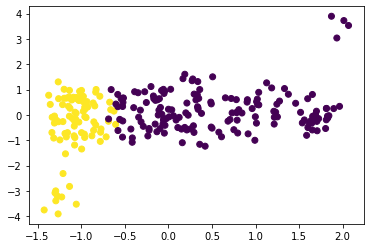

In [9]:
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

* Observaciones:
* la distribución de nuestros datos no varía, 
* las escalas de los ejes son mucho mas parecidas,
* no hubo efecto sobre los grupos de outlayers   


* 3) Procederemos a reescalar utilizando otra herramienta de Scikit_Learn: QuantileTransformer
* Utilizando cuantiles en lugar de la desviación estandard podemos reducir la distancia entre los outlayrs

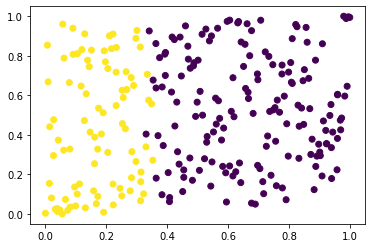

In [10]:
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

* Observaciones:
* los ejes quedan totalemnte normalizados entre 0 y 1
* los outlayers siguen siendo parte del conjunto de datos, pero tienen menos efecto

In [11]:
# Función para escalar los datos, correr el modelo y organizar los tres gráficos comparativos

def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

* Efecto de reescalar utilizando StandardScaler

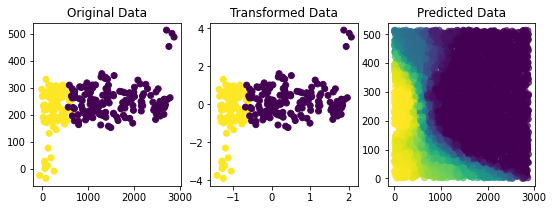

In [38]:
plot_output(scaler = StandardScaler())

* Efecto de reescalar utilizando QuantileTransformer

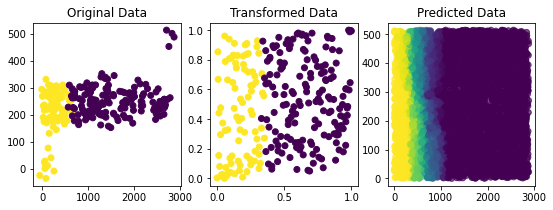

In [39]:
plot_output(scaler = QuantileTransformer(n_quantiles=100))

# Ejercicio 2

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

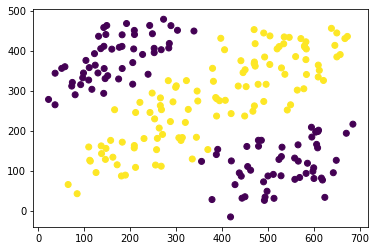

In [14]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

* En este ejemplo observamos que los datos no pueden ser dividos en dos conjuntos por una única línea, 
* Necesitaremos utilizar otro tipo de modelo, en lugar del KNeighbors,
* En su lugar utilizaremos el modelo de regresión logística.
* Procederemos a transformar los datos reescalandolos y observar que sucede.

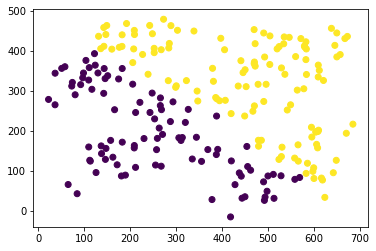

In [17]:
pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

* Es apreciable que los conjuntos de datos no fueron bien separados,
* Necesitaremos utilizar otro método para reescalar los datos, que incluya a las variables no liniales que utiliza el método de regresión logística,
* Utilizaremos PolynomialFeatures() en lugar de QuantileTransformer(),
* X1*X2, X1 2, X2 2

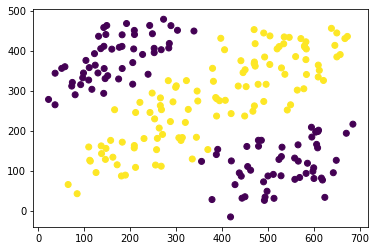

In [19]:
pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

* Podemos observar como un simple paso de preprocesamiento adecuado, puede modificar en gran medida la ontención de nuestras predicciones.

# Ejercicio 3: One Hot Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

* Realizaremos un paso de preprocesamiento para convertir nuestros datos categóricos en datos numéricos (One Hot Encoding)

In [22]:
enc = OneHotEncoder(sparse=False, # me permite ver el resultado como un dataframe
                    handle_unknown='ignore') # para poder agregar variables que no tenemos originalmente y obtener todos ceros.
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [23]:
enc.transform([["zero"]])

array([[0., 0., 0.]])